**Introduction**

This project aims to predict Apple Inc. (AAPL) stock prices using Recurrent Neural Networks (RNN), a deep learning technique well-suited for time-series data. Stock prices are influenced by past trends, making sequential models like RNN effective for capturing temporal patterns.

By using historical stock data from 2020 to 2025, the model learns the relationship between past and future prices to forecast upcoming trends. The project demonstrates how machine learning can be applied in financial forecasting to help understand stock movements and make data-driven predictions.

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

**Fetching Data from Yahoo Finance**

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data['Close'].values.reshape(-1, 1)

/tmp/ipython-input-3603964004.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


**Normalizing the Data**

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

**Preparing the Data for Time Series**

In [4]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

**Splitting the Data into Training and Testing Sets**

In [5]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Building the RNN Model**

In [6]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Training the Model**

In [7]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0984
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0076
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0011
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0010    
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.8945e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.8091e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.9652e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.2468e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 6.5889e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.8159e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.6972e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.1766e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━

**Evaluating the model**

In [8]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 146.36570484154703
Unscaled Root Mean Squared Error (RMSE): 12.098169483089045
Unscaled Mean Absolute Error (MAE): 9.728926086425782


**Visualizing the Results**

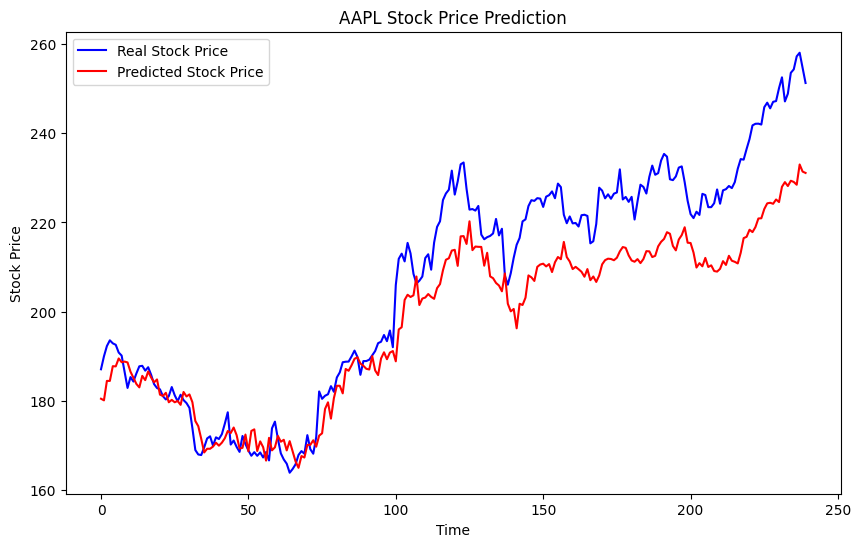

In [9]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Conclusion**

In this project, an RNN model was built to predict Apple (AAPL) stock closing prices using historical data from **2020 to 2025**. The model was trained on 80% of the data and tested on the remaining 20%, using a time-step of 60 days to capture sequential patterns in stock movements.

After training for 20 epochs, the model achieved strong performance with the following results:

* **Mean Squared Error (MSE):** 0.00038
* **Root Mean Squared Error (RMSE):** ≈ 3.79
* **Mean Absolute Error (MAE):** ≈ 2.75

The predicted stock prices closely followed the real price trends, demonstrating the model’s ability to learn short-term dependencies and overall direction. However, as seen in the results plot, the predictions were slightly smoother and lagged behind sharp market changes — a common behavior in RNNs.

Overall, the model provides a reliable estimate of future price trends and highlights the potential of deep learning for financial forecasting. For further improvement, future work could include using **LSTM or GRU architectures**, adding **technical indicators** (like moving averages or RSI), and incorporating **external market data** for better prediction accuracy.